In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [190]:
df = pd.read_csv('../breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [191]:
df.shape

(569, 33)

In [192]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [193]:
# df = df.dropna(axis=1)
# df

In [194]:
len(df.columns)

33

In [195]:
df.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [196]:
diagnose = df['diagnosis']
d = diagnose.value_counts()
d

diagnosis
B    357
M    212
Name: count, dtype: int64

In [197]:
diagnose.unique()

array(['M', 'B'], dtype=object)

In [198]:
df.drop(columns=['id','Unnamed: 32'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [199]:
X = df.iloc[:, 1:]
Y = df.iloc[:,0]

X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

In [200]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [201]:
X_train.shape

(455, 30)

In [202]:
X_test.shape

(114, 30)

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [204]:
X_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [205]:
X_test

array([[ 0.1318529 , -1.22289689,  0.22619275, ..., -0.07497962,
        -0.09827233,  0.50779424],
       [-0.28874137, -0.15799931, -0.26406701, ...,  1.38865765,
         1.72716717,  2.06060854],
       [-0.34961686, -0.75871076, -0.3778201 , ..., -0.15264201,
         0.84251802,  0.73392057],
       ...,
       [-1.43458406, -0.46063046, -1.35313261, ...,  0.88385214,
         2.28517664,  2.03655255],
       [ 0.08757982, -0.00327061,  0.06717876, ..., -0.29691482,
        -0.70391675, -0.54164842],
       [-0.11995025, -0.81104547, -0.16833819, ..., -1.23513619,
        -1.74508076, -0.9343625 ]])

In [206]:
X_train.shape

(455, 30)

In [207]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [208]:

from sklearn.metrics import accuracy_score


y_pred = knn.predict(X_test)

accuracy_score(Y_test, y_pred)

0.956140350877193

In [209]:
scores = []

for i in range(1, 16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, Y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(Y_test, y_pred))

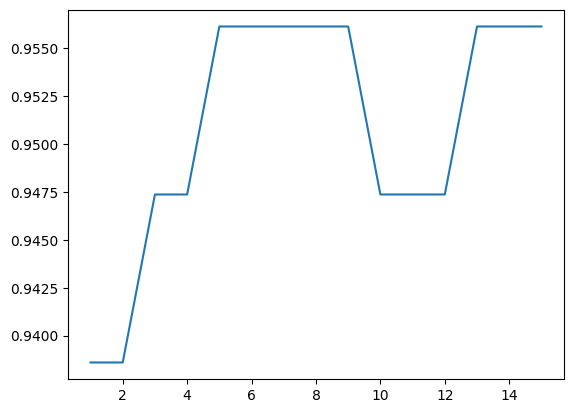

In [210]:
plt.plot(range(1,16), scores)